### **In-Depth Analysis of Air Quality Index (AQI) in Delhi**

# Introduction
Air Quality Index (AQI) is a critical indicator of environmental health, reflecting the concentration of various pollutants in the atmosphere. High AQI values signify poor air quality, which poses significant risks to public health, ecosystems, and overall quality of life. Delhi, the capital city of India, has been grappling with severe air pollution issues for several years, making it an ideal case study for analyzing AQI dynamics.

# Objectives

The primary objective of this analysis is to comprehensively examine the AQI in Delhi by:

    Identifying and evaluating the key pollutants contributing to air quality degradation.
    Understanding the seasonal variations and their impact on AQI levels.
    Assessing the influence of geographical factors on air quality across different regions of Delhi.
    Providing actionable insights and recommendations to improve air quality and mitigate public health risks.

# Research Questions

To guide this analysis, the following research questions have been formulated:
1. Key Pollutants

    RQ1: What are the primary pollutants contributing to Delhi's AQI, and how do their concentrations vary over time?
    RQ2: How do levels of CO, NO, NO₂, O₃, SO₂, PM2.5, PM10, and NH₃ correlate with overall AQI values?

2. Seasonal Variations

    RQ3: How does AQI in Delhi fluctuate across different seasons (Winter, Summer, Monsoon, Post-Monsoon)?
    RQ4: What are the peak pollution periods within each season, and what factors contribute to these spikes?

3. Geographical Factors

    RQ5: How does AQI vary across different regions or districts within Delhi?
    RQ6: What geographical features (e.g., proximity to industrial areas, traffic density, green cover) influence air quality in these regions?

4. Impact on Public Health

    RQ7: What is the relationship between AQI levels and public health indicators (e.g., respiratory issues, hospital admissions)?
    RQ8: How effective are current air quality improvement measures in mitigating health impacts?

# Step : 1 Data Loading and Preparation:

    The cleaned dataset is loaded from the CSV file.
    Additional columns for month and season are added to analyze seasonal variations.

In [21]:
import pandas as pd
import numpy as np




In [2]:
# Load AQI data
aqi_df = pd.read_csv('/content/delhiaqi.csv')



In [4]:
# Convert date column to datetime
aqi_df['date'] = pd.to_datetime(aqi_df['date'])



In [6]:
import pandas as pd
from scipy import stats
import numpy as np



In [7]:
# Load AQI data
aqi_df = pd.read_csv('/content/delhiaqi.csv')

In [8]:
#  Convert 'date' column to datetime
aqi_df['date'] = pd.to_datetime(aqi_df['date'], errors='coerce')

In [9]:
#  Handle any NaT values by dropping those rows
aqi_df = aqi_df.dropna(subset=['date'])

In [10]:
#  Set 'date' as the index
aqi_df.set_index('date', inplace=True)

In [11]:
#  Handle missing values by interpolation
aqi_df.interpolate(method='time', inplace=True)

In [12]:
#  Detect and remove outliers using Z-score
numeric_cols = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
aqi_df = aqi_df[(np.abs(stats.zscore(aqi_df[numeric_cols])) < 3).all(axis=1)]

In [13]:
# Verify the DataFrame
print(aqi_df.head())
print(aqi_df.isnull().sum())

                          co     no    no2    o3    so2   pm2_5    pm10    nh3
date                                                                          
2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   5.83
2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   7.66
2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68  11.40
2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12  13.55
2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80  14.19
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [14]:
# Convert pollutant columns to numeric, coercing errors to NaN
for col in numeric_cols:
    aqi_df[col] = pd.to_numeric(aqi_df[col], errors='coerce')


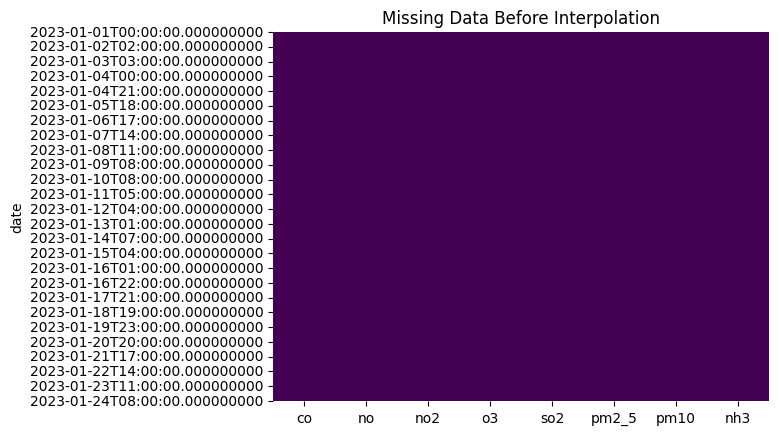

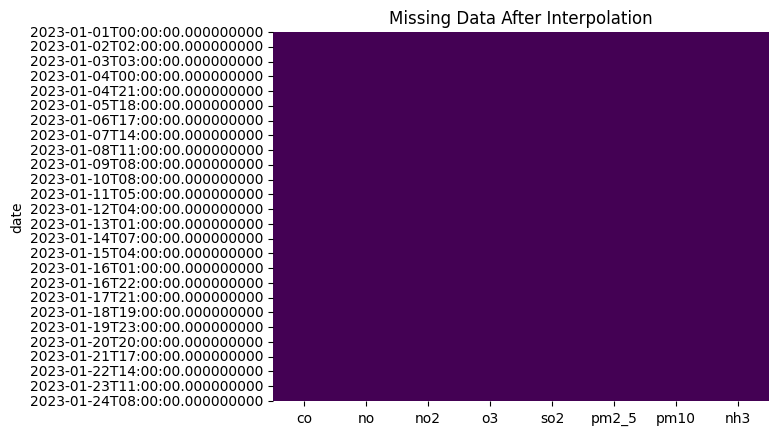

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data before interpolation
sns.heatmap(aqi_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Before Interpolation')
plt.show()

# Perform interpolation
aqi_df.interpolate(method='time', inplace=True)

# Visualize missing data after interpolation
sns.heatmap(aqi_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data After Interpolation')
plt.show()


In [16]:
aqi_df.to_csv('delhi_aqi_cleaned.csv')


In [22]:
#  Add 'Month' and 'Season' columns to capture seasonal variations
aqi_df['Month'] = aqi_df.index.month
aqi_df['Season'] = aqi_df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2]
                                                 else 'Summer' if x in [3, 4, 5]
                                                 else 'Monsoon' if x in [6, 7, 8]
                                                 else 'Post-Monsoon')

#Step : 2 Visualization of Seasonal Variations:
A boxplot for each pollutant across the four seasons is created, allowing you to see how pollutants like PM2.5, CO, NO2, etc., vary throughout the year.

In [23]:
#  Visualize Seasonal Variations in Key Pollutants
# List of pollutants
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

<ipython-input-24-4056af48db2c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y=pollutant, data=aqi_df, palette='Set2')
<ipython-input-24-4056af48db2c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y=pollutant, data=aqi_df, palette='Set2')
<ipython-input-24-4056af48db2c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y=pollutant, data=aqi_df, palette='Set2')
<ipython-input-24-4056af48db2c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

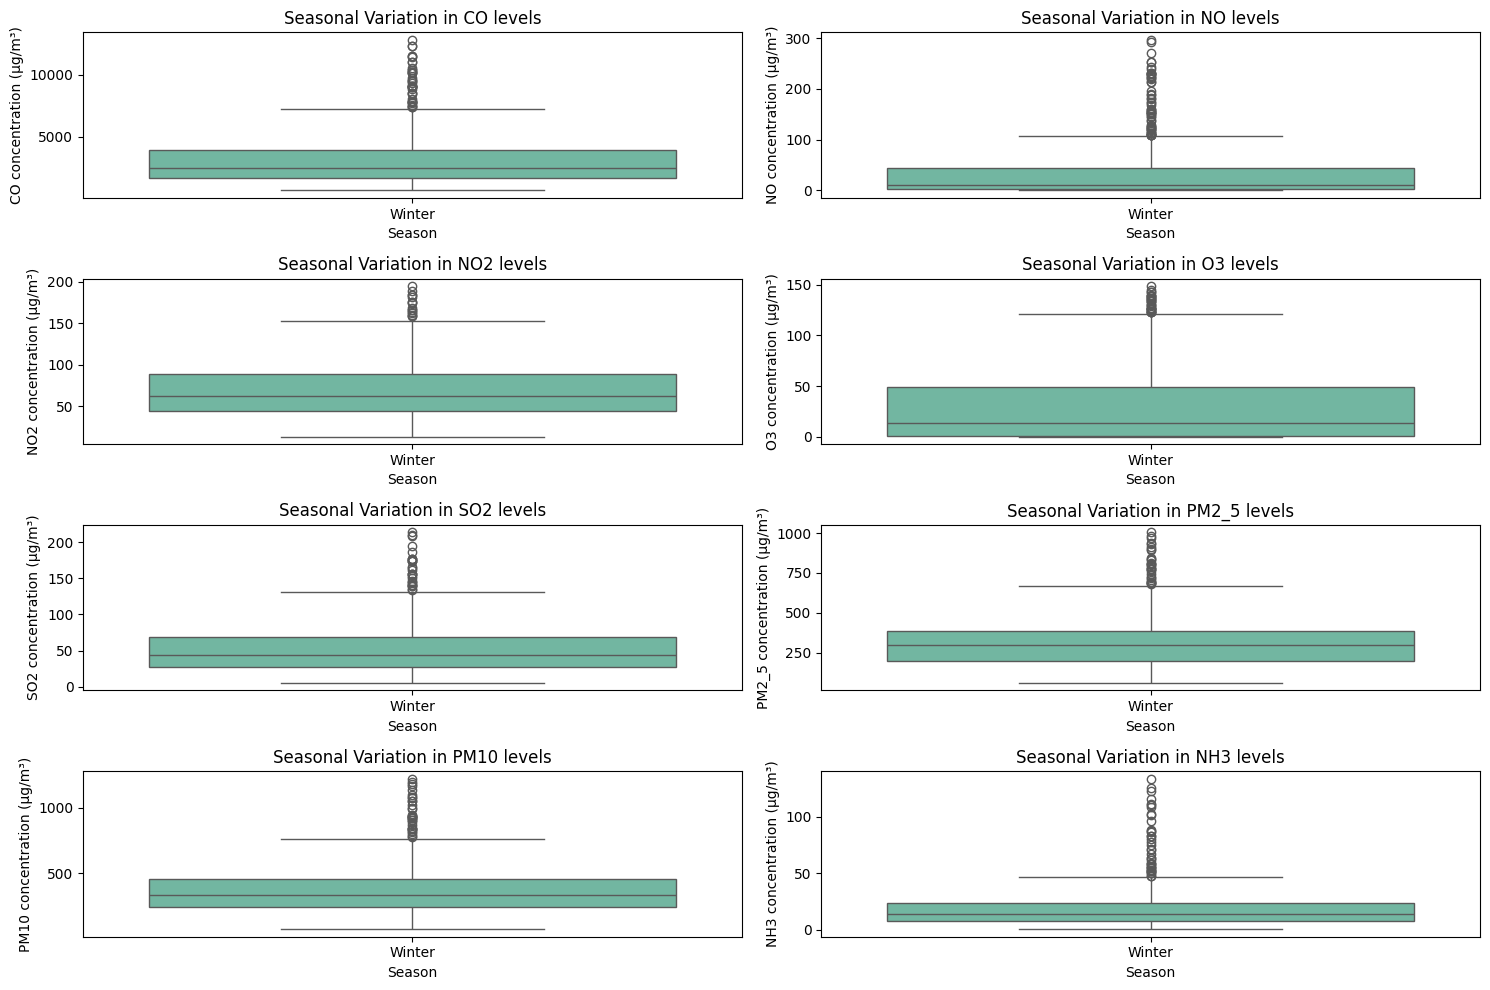

In [24]:

# Plot seasonal variations for each pollutant
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='Season', y=pollutant, data=aqi_df, palette='Set2')
    plt.title(f'Seasonal Variation in {pollutant.upper()} levels')
    plt.ylabel(f'{pollutant.upper()} concentration (µg/m³)')
    plt.xlabel('Season')
plt.tight_layout()
plt.show()

# Step : 3 Correlation Analysis:
A correlation heatmap shows the relationships between different pollutants, giving insights into how certain pollutants might rise together

In [25]:
#  Correlation Analysis Between Pollutants
corr_matrix = aqi_df[pollutants].corr()

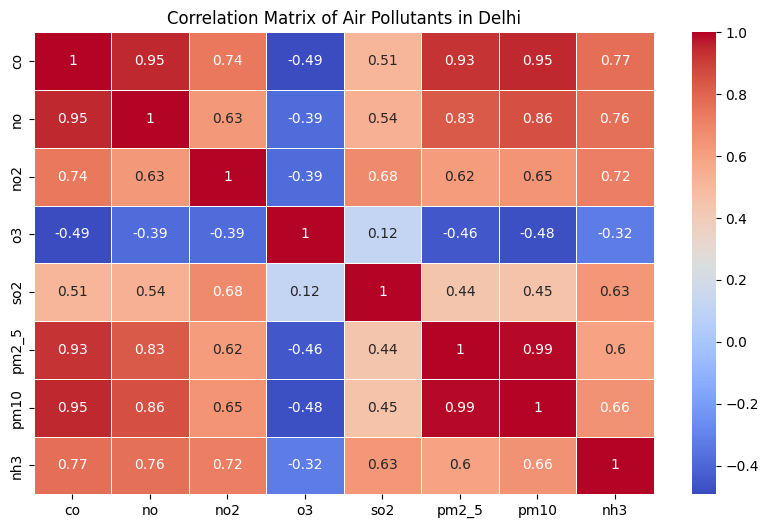

In [26]:
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Air Pollutants in Delhi')
plt.show()

# Step : 4 Time Series Plot:
A time series plot of key pollutants (PM2.5, PM10, CO, NO2) gives an overview of how these pollutants fluctuate over time.

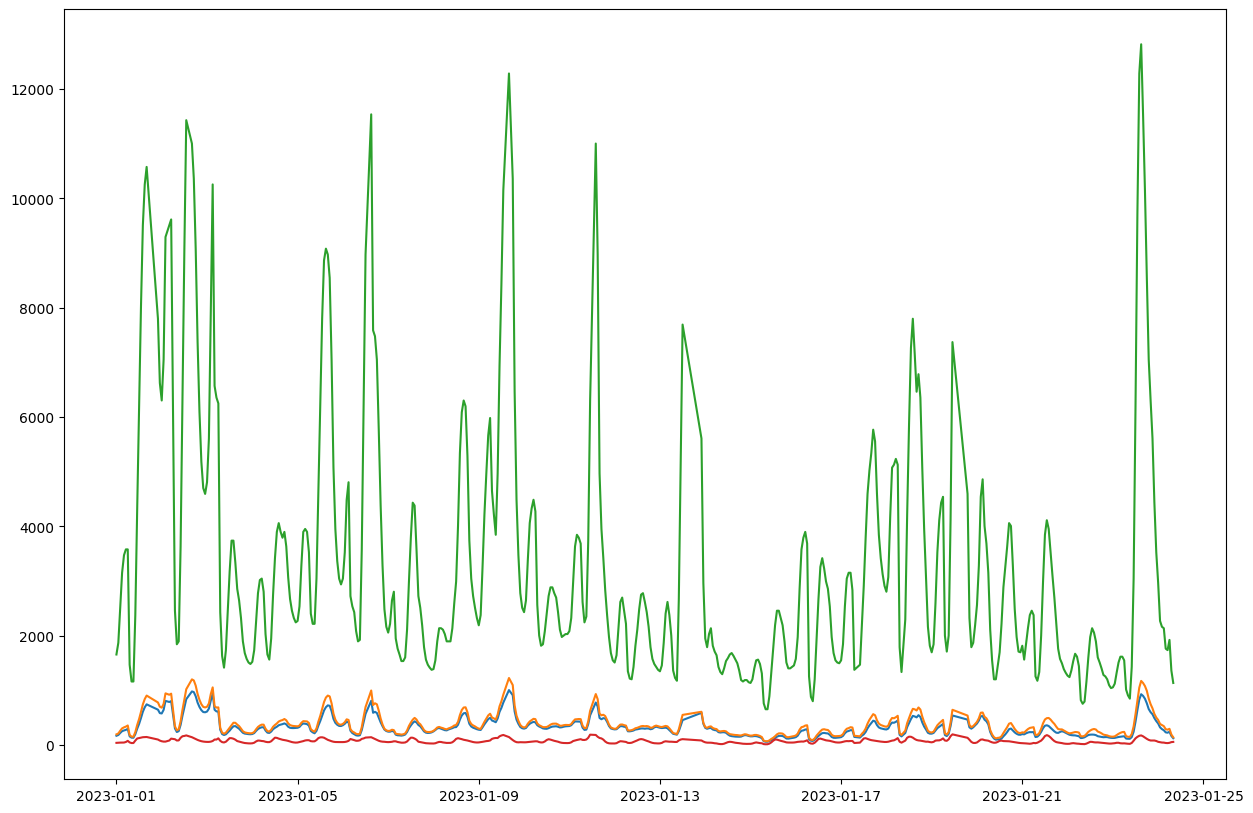

In [27]:
#  Time Series Plot for Key Pollutants Over the Year
plt.figure(figsize=(15, 10))
for pollutant in ['pm2_5', 'pm10', 'co', 'no2']:
    plt.plot(aqi_df.index, aqi_df[pollutant], label=pollutant.upper())

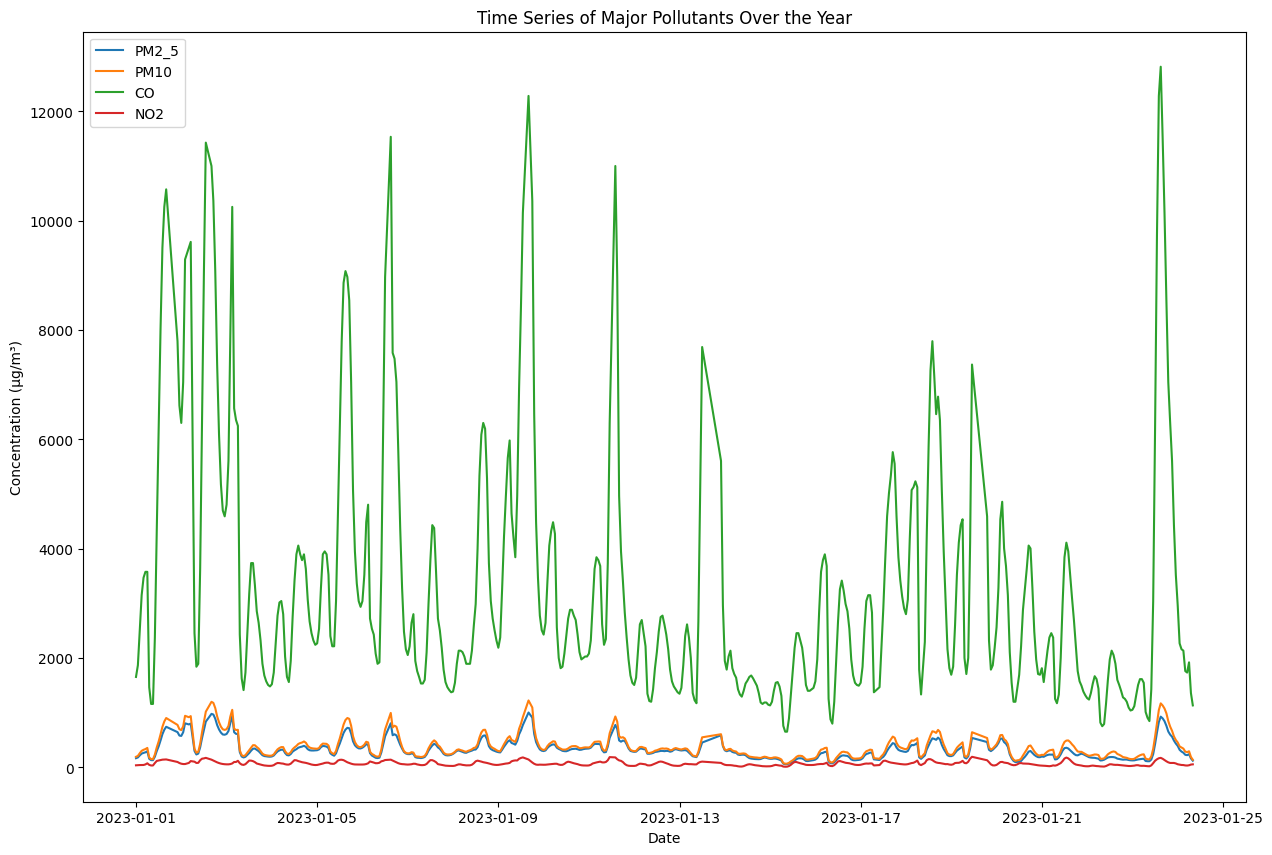

In [28]:
#  Time Series Plot for Key Pollutants Over the Year
plt.figure(figsize=(15, 10))
for pollutant in ['pm2_5', 'pm10', 'co', 'no2']:
    plt.plot(aqi_df.index, aqi_df[pollutant], label=pollutant.upper())

plt.title('Time Series of Major Pollutants Over the Year')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.show()

# Tools and Technologies

The analysis leverages the following tools and libraries:

Programming Language: Python
Libraries:
        Data Manipulation: pandas, numpy
        Visualization: matplotlib, seaborn, plotly, folium, geopandas
        Statistical Analysis: statsmodels, scipy
        Machine Learning: scikit-learn, fbprophet
        Geospatial Analysis: geopandas, folium

# Conclusion

**Through this comprehensive analysis, we aim to unravel the complex dynamics of air quality in Delhi, identifying critical pollutants, understanding seasonal and geographical influences, and assessing the broader implications on public health. The insights derived will serve as a foundation for developing targeted strategies to enhance air quality and safeguard the well-being of Delhi's residents.**